# Import Library

In [67]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
import seaborn as sns

# Read CSV

In [68]:
data = pd.read_csv(r'data-scraping\main-dataset\dataset-total.csv', delimiter = ",")
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1910399909594902913,Fri Apr 11 09:21:38 +0000 2025,9052,@convomf gapunya pacar kak adanya ini https://...,1910624272713998482,https://pbs.twimg.com/media/GoPmpmNaEAAZyQh.jpg,convomf,in,NaN,210,82,582,https://x.com/gaegorgeus/status/19106242727139...,1836338050890371072,gaegorgeus
1,1910399909594902913,Fri Apr 11 06:18:49 +0000 2025,8291,@convomf chat lama sih tpi smpe slrg kl baca i...,1910578261496906103,https://pbs.twimg.com/media/GoO8zF0bYAIivp6.jpg,convomf,in,NaN,73,37,308,https://x.com/ellleelele/status/19105782614969...,1613791762329522178,ellleelele
2,1910399909594902913,Fri Apr 11 14:34:02 +0000 2025,7520,@convomf aku punya seekor yg kek gini https://...,1910702888449622307,https://pbs.twimg.com/media/GoQuJXybYAIjHRt.jpg,convomf,in,NaN,262,154,483,https://x.com/umjikyeo992/status/1910702888449...,1688586795011985408,umjikyeo992
3,1910399909594902913,Fri Apr 11 07:56:21 +0000 2025,3148,@convomf adanya sm driver lg nih kocak tbtb bg...,1910602809176965297,https://pbs.twimg.com/media/GoPTH9WbYAMctOT.jpg,convomf,in,bedroom.,57,25,124,https://x.com/anisalauraa/status/1910602809176...,353472413,anisalauraa
4,1910399909594902913,Fri Apr 11 10:38:50 +0000 2025,3092,@convomf tiap kali baca ini ngakak terus https...,1910643700906295568,https://pbs.twimg.com/media/GoP4Ue5bYAAs8ks.jpg,convomf,in,NaN,62,55,112,https://x.com/autumnoon_/status/19106437009062...,1399715831924158471,autumnoon_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,1908429432433369456,Sun Apr 06 00:05:50 +0000 2025,0,@convomf Good lah kalo ikut bangga dengan penc...,1908672460201091254,NaN,convomf,in,"Jakarta, Indonesia",0,0,0,https://x.com/HappyHahn/status/190867246020109...,63419495,HappyHahn
3298,1908429432433369456,Sun Apr 06 02:49:41 +0000 2025,0,@convomf Takut banget kalau dikasih tau gajiny...,1908713693262864414,NaN,convomf,in,"Tokorozawa-shi, Saitama",0,0,0,https://x.com/choconays/status/190871369326286...,885405230908583936,choconays
3299,1908429432433369456,Sun Apr 06 10:32:26 +0000 2025,0,@convomf km bocil y nder,1908830150294126769,NaN,convomf,in,NaN,0,0,0,https://x.com/paletaria/status/190883015029412...,1724038938640486400,paletaria
3300,1908429432433369456,Sat Apr 05 23:12:52 +0000 2025,1,@convomf 3 dari nama yg disitu gue kenal nder....,1908659128488411331,NaN,convomf,in,NaN,0,0,0,https://x.com/rtmasyan/status/1908659128488411331,245366390,rtmasyan


In [69]:
kamus_tidak_baku = pd.read_csv(r'data\kamusalay.csv', encoding='ISO-8859-1', header = None)
kamus_tb_index = kamus_tidak_baku.set_index(0).to_dict('dict')[1]
kamus_tb_index

# referensi kamus alay: https://ieeexplore.ieee.org/document/8629262

{'anakjakartaasikasik': 'anak jakarta asyik asyik',
 'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin ',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik ',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah ',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air ',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokdito

# Eksplorasi Data

In [70]:
data.lang.value_counts()

lang
in     3022
en      101
qme      53
und      26
tl       19
nl       17
ht       13
qam      12
lv       10
es        4
tr        4
cy        4
de        3
hi        3
is        2
da        2
sv        2
no        1
it        1
lt        1
et        1
hu        1
Name: count, dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      3302 non-null   int64 
 1   created_at               3302 non-null   object
 2   favorite_count           3302 non-null   int64 
 3   full_text                3302 non-null   object
 4   id_str                   3302 non-null   int64 
 5   image_url                1299 non-null   object
 6   in_reply_to_screen_name  1376 non-null   object
 7   lang                     3302 non-null   object
 8   location                 1523 non-null   object
 9   quote_count              3302 non-null   int64 
 10  reply_count              3302 non-null   int64 
 11  retweet_count            3302 non-null   int64 
 12  tweet_url                3302 non-null   object
 13  user_id_str              3302 non-null   int64 
 14  username                 3302 non-null  

In [72]:
data.describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,3.302000e+03,3302.000000,3.302000e+03,3302.000000,3302.000000,3302.000000,3.302000e+03
mean,1.909783e+18,6078.220472,1.909873e+18,293.795578,401.038159,393.569958,1.259531e+18
std,2.168447e+15,13097.722631,2.102483e+15,724.222432,776.135524,1051.155391,4.155312e+17
min,1.900609e+18,0.000000,1.900609e+18,0.000000,0.000000,0.000000,1.487748e+07
25%,1.908429e+18,2.000000,1.908726e+18,0.000000,0.000000,0.000000,1.314975e+18
50%,1.910191e+18,221.500000,1.910191e+18,9.000000,41.000000,10.000000,1.331651e+18
75%,1.911661e+18,5035.750000,1.911661e+18,247.000000,459.750000,187.000000,1.331651e+18
max,1.912813e+18,98034.000000,1.912813e+18,8877.000000,5980.000000,9142.000000,1.903089e+18


# Preprocessing

In [73]:
data_group = data[data.lang == "in"].reset_index(drop=True)
data_group.lang.value_counts()

lang
in    3022
Name: count, dtype: int64

In [74]:
data_selected = data_group.full_text
data_selected

0       @convomf gapunya pacar kak adanya ini https://...
1       @convomf chat lama sih tpi smpe slrg kl baca i...
2       @convomf aku punya seekor yg kek gini https://...
3       @convomf adanya sm driver lg nih kocak tbtb bg...
4       @convomf tiap kali baca ini ngakak terus https...
                              ...                        
3017    @convomf Good lah kalo ikut bangga dengan penc...
3018    @convomf Takut banget kalau dikasih tau gajiny...
3019                             @convomf km bocil y nder
3020    @convomf 3 dari nama yg disitu gue kenal nder....
3021                        @convomf Mau minjem duit y lu
Name: full_text, Length: 3022, dtype: object

In [75]:
# check duplicates & null
display(data_selected.duplicated().value_counts())
display(data_selected.isna().value_counts())
# delete duplicates
data_dd = data_selected.drop_duplicates().reset_index(drop=True)
display(data_dd)
display(data_dd.duplicated().value_counts())
# bikin dataframe baru supaya lebih fresh dalam preprocessing
data_f = pd.DataFrame(data_dd)

full_text
False    1592
True     1430
Name: count, dtype: int64

full_text
False    3022
Name: count, dtype: int64

0       @convomf gapunya pacar kak adanya ini https://...
1       @convomf chat lama sih tpi smpe slrg kl baca i...
2       @convomf aku punya seekor yg kek gini https://...
3       @convomf adanya sm driver lg nih kocak tbtb bg...
4       @convomf tiap kali baca ini ngakak terus https...
                              ...                        
1587    @convomf Good lah kalo ikut bangga dengan penc...
1588    @convomf Takut banget kalau dikasih tau gajiny...
1589                             @convomf km bocil y nder
1590    @convomf 3 dari nama yg disitu gue kenal nder....
1591                        @convomf Mau minjem duit y lu
Name: full_text, Length: 1592, dtype: object

full_text
False    1592
Name: count, dtype: int64

In [76]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'[²]', '', text) # menghapus pangkat pada kata
 
    text = text.replace('.', '') # menghapus titik & koma
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def replacingText(text): 
    word_dict = []
    for word in text:
        word_dict.append(kamus_tb_index.get(word, word)) # Mengganti kata-kata gaul dengan kata-kata standar
    text = word_dict
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    extra_stopword = ["nder", "sih", "sender", "guys", "di", "tanyarl", "convomf"]
    stopword = StopWordRemoverFactory().get_stop_words() + extra_stopword # Menghapus stopwords dalam teks
    word_removed = []
    # text = [word for word in text if not word in stopword]
    strip_word = [word.strip() for word in text]
    word_removed = [word for word in strip_word if not word in stopword]
    # for word in text:
    #     if word not in stopword:
    #         word_removed.append(word)
    return word_removed

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [77]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data_f['text_clean'] = data_f['full_text'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
data_f['text_casefoldingText'] = data_f['text_clean'].apply(casefoldingText)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data_f['text_tokenizingText'] = data_f['text_casefoldingText'].apply(tokenizingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data_f['text_slangwords'] = data_f['text_tokenizingText'].apply(replacingText)

# Penggulangan tambahan:
data_f['text_mergingText'] = data_f['text_slangwords'].apply(toSentence)
data_f['text_tokenizingText2'] = data_f['text_mergingText'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
data_f['text_stopword'] = data_f['text_tokenizingText2'].apply(filteringText)

# Menghapus imbuhan pada kata-kata
data_f['text_stemming'] = data_f['text_stopword'].apply(stemmingText) 

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
# data_f['text_akhir'] = data_f['text_stopword'].apply(toSentence)
data_f['text_akhir'] = data_f['text_stemming'].apply(toSentence) 

In [78]:
print(StopWordRemoverFactory().get_stop_words())

['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

In [79]:
data_f

,full_text,text_clean,text_casefoldingText,text_tokenizingText,text_slangwords,text_mergingText,text_tokenizingText2,text_stopword,text_stemming,text_akhir
0,@convomf gapunya pacar kak adanya ini https://...,gapunya pacar kak adanya ini,gapunya pacar kak adanya ini,"[gapunya, pacar, kak, adanya, ini]","[tidak punya, pacar, kak, adanya, ini]",tidak punya pacar kak adanya ini,"[tidak, punya, pacar, kak, adanya, ini]","[pacar, kak]","[pacar, kak]",pacar kak
1,@convomf chat lama sih tpi smpe slrg kl baca i...,chat lama sih tpi smpe slrg kl baca ini ttp ng...,chat lama sih tpi smpe slrg kl baca ini ttp ng...,"[chat, lama, sih, tpi, smpe, slrg, kl, baca, i...","[chat, lama, sih, tapi , sampai , slrg, kalau ...",chat lama sih tapi sampai slrg kalau baca i...,"[chat, lama, sih, tapi, sampai, slrg, kalau, b...","[chat, slrg, baca, terbahak-bahak]","[chat, slrg, baca, bahak]",chat slrg baca bahak
2,@convomf aku punya seekor yg kek gini https://...,aku punya seekor yg kek gini,aku punya seekor yg kek gini,"[aku, punya, seekor, yg, kek, gini]","[saya, punya, seekor, yang , kayak, begini]",saya punya seekor yang kayak begini,"[saya, punya, seekor, yang, kayak, begini]","[seekor, kayak]","[ekor, kayak]",ekor kayak
3,@convomf adanya sm driver lg nih kocak tbtb bg...,adanya sm driver lg nih kocak tbtb bgt proud o...,adanya sm driver lg nih kocak tbtb bgt proud o...,"[adanya, sm, driver, lg, nih, kocak, tbtb, bgt...","[adanya, sama , driver, lagi , nih, kocak, tib...",adanya sama driver lagi nih kocak tiba tiba ...,"[adanya, sama, driver, lagi, nih, kocak, tiba,...","[driver, nih, kocak, proud, of]","[driver, nih, kocak, proud, of]",driver nih kocak proud of
4,@convomf tiap kali baca ini ngakak terus https...,tiap kali baca ini ngakak terus,tiap kali baca ini ngakak terus,"[tiap, kali, baca, ini, ngakak, terus]","[tiap, kali, baca, ini, terbahak-bahak , terus]",tiap kali baca ini terbahak-bahak terus,"[tiap, kali, baca, ini, terbahak-bahak, terus]","[baca, terbahak-bahak]","[baca, bahak]",baca bahak
...,...,...,...,...,...,...,...,...,...,...
1587,@convomf Good lah kalo ikut bangga dengan penc...,Good lah kalo ikut bangga dengan pencapaian so...,good lah kalo ikut bangga dengan pencapaian so...,"[good, lah, kalo, ikut, bangga, dengan, pencap...","[good, lah, kalau , ikut, bangga, dengan, penc...",good lah kalau ikut bangga dengan pencapaian ...,"[good, lah, kalau, ikut, bangga, dengan, penca...","[good, bangga, pencapaian, saudaranya, namanya...","[good, bangga, capai, saudara, nama, saudara, ...",good bangga capai saudara nama saudara hasil
1588,@convomf Takut banget kalau dikasih tau gajiny...,Takut banget kalau dikasih tau gajinya berapa ...,takut banget kalau dikasih tau gajinya berapa ...,"[takut, banget, kalau, dikasih, tau, gajinya, ...","[takut, sekali , kalau, dikasih, tahu, gajinya...",takut sekali kalau dikasih tahu gajinya berap...,"[takut, sekali, kalau, dikasih, tahu, gajinya,...","[takut, dikasih, gajinya, pinjam, duit, keperl...","[takut, kasih, gaji, pinjam, duit, perlu, pas,...",takut kasih gaji pinjam duit perlu pas tagih g...
1589,@convomf km bocil y nder,km bocil y nder,km bocil y nder,"[km, bocil, y, nder]","[kamu, bocah cilik, iya, nder]",kamu bocah cilik iya nder,"[kamu, bocah, cilik, iya, nder]","[bocah, cilik, iya]","[bocah, cilik, iya]",bocah cilik iya
1590,@convomf 3 dari nama yg disitu gue kenal nder....,dari nama yg disitu gue kenal nder Kira inisia...,dari nama yg disitu gue kenal nder kira inisia...,"[dari, nama, yg, disitu, gue, kenal, nder, kir...","[dari, nama, yang , di situ, saya, kenal, nder...",dari nama yang di situ saya kenal nder kira i...,"[dari, nama, yang, di, situ, saya, kenal, nder...","[nama, situ, kenal, inisial, nih]","[nama, situ, kenal, inisial, nih]",nama situ kenal inisial nih


In [80]:
data_f[["full_text","text_slangwords", "text_stopword", "text_akhir"]]

,full_text,text_slangwords,text_stopword,text_akhir
0,@convomf gapunya pacar kak adanya ini https://...,"[tidak punya, pacar, kak, adanya, ini]","[pacar, kak]",pacar kak
1,@convomf chat lama sih tpi smpe slrg kl baca i...,"[chat, lama, sih, tapi , sampai , slrg, kalau ...","[chat, slrg, baca, terbahak-bahak]",chat slrg baca bahak
2,@convomf aku punya seekor yg kek gini https://...,"[saya, punya, seekor, yang , kayak, begini]","[seekor, kayak]",ekor kayak
3,@convomf adanya sm driver lg nih kocak tbtb bg...,"[adanya, sama , driver, lagi , nih, kocak, tib...","[driver, nih, kocak, proud, of]",driver nih kocak proud of
4,@convomf tiap kali baca ini ngakak terus https...,"[tiap, kali, baca, ini, terbahak-bahak , terus]","[baca, terbahak-bahak]",baca bahak
...,...,...,...,...
1587,@convomf Good lah kalo ikut bangga dengan penc...,"[good, lah, kalau , ikut, bangga, dengan, penc...","[good, bangga, pencapaian, saudaranya, namanya...",good bangga capai saudara nama saudara hasil
1588,@convomf Takut banget kalau dikasih tau gajiny...,"[takut, sekali , kalau, dikasih, tahu, gajinya...","[takut, dikasih, gajinya, pinjam, duit, keperl...",takut kasih gaji pinjam duit perlu pas tagih g...
1589,@convomf km bocil y nder,"[kamu, bocah cilik, iya, nder]","[bocah, cilik, iya]",bocah cilik iya
1590,@convomf 3 dari nama yg disitu gue kenal nder....,"[dari, nama, yang , di situ, saya, kenal, nder...","[nama, situ, kenal, inisial, nih]",nama situ kenal inisial nih


## Frequent Analyst
- Untuk memeriksa teks, apakah ada kata-kata terlihat kurang penting ngga ya? sebelum cleaning data

In [81]:
def design_WordCloud(value, title):
    wordcloud = WordCloud(background_color = "black", max_words = 150).generate(value)
    fig = plt.figure(figsize = (5, 3))
    fig.set_layout_engine('constrained')
    plt.title("Word Cloud " + title)
    plt.imshow(wordcloud, interpolation = "bilinear", alpha = 1)
    plt.axis("off")
    plt.show()

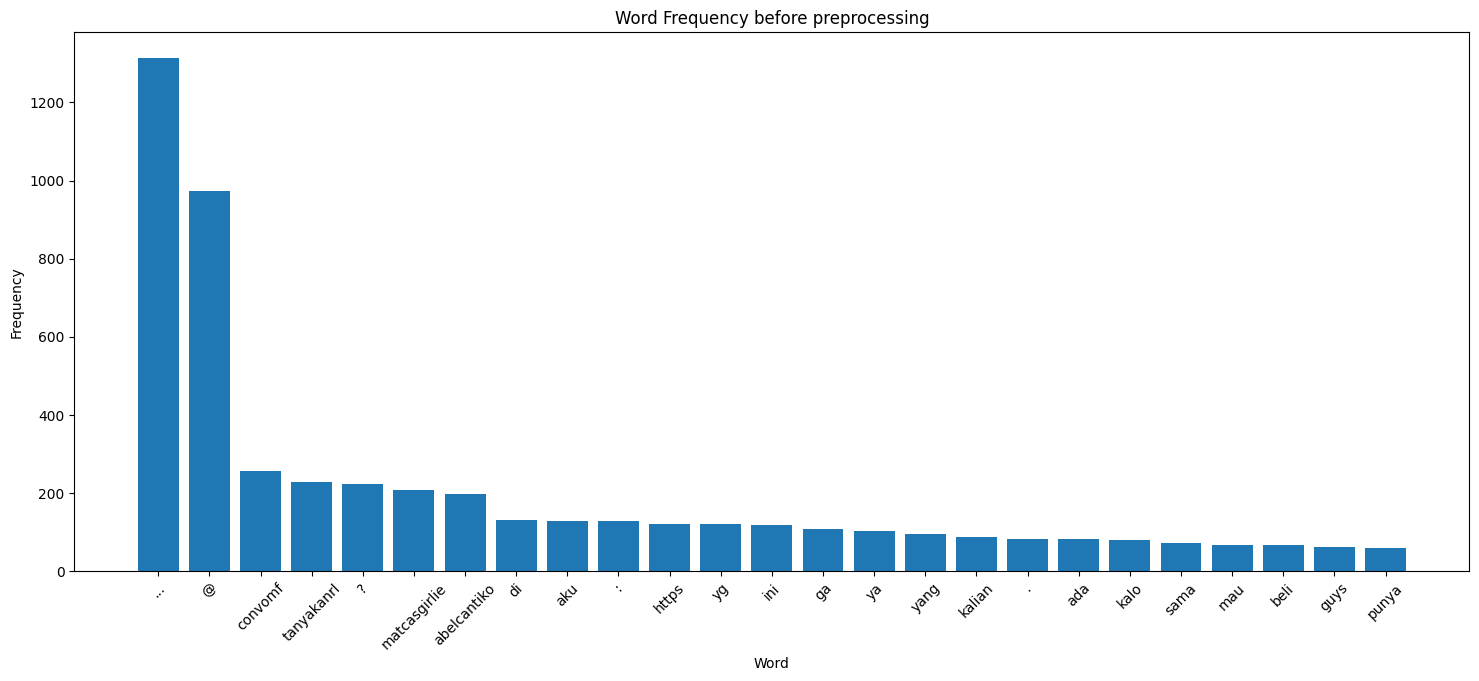

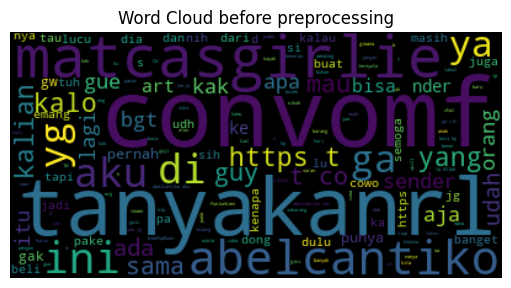

In [82]:
text_list = word_tokenize(data_dd.to_string())

word_data = Counter(text_list).most_common(25)

text_bef = "before preprocessing"
plt.figure(figsize=(18, 7))
plt.bar(*zip(*word_data))
plt.title('Word Frequency ' + text_bef)
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

design_WordCloud(data_dd.to_string(), text_bef)

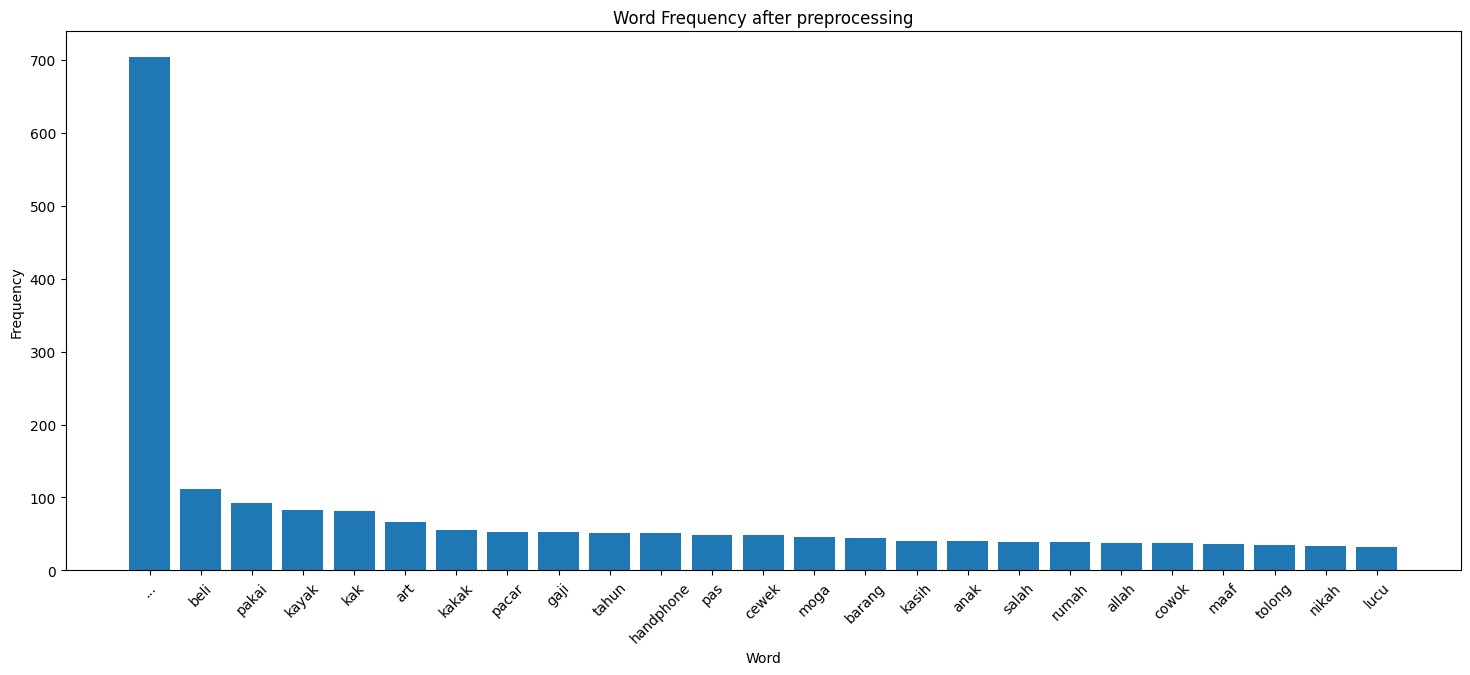

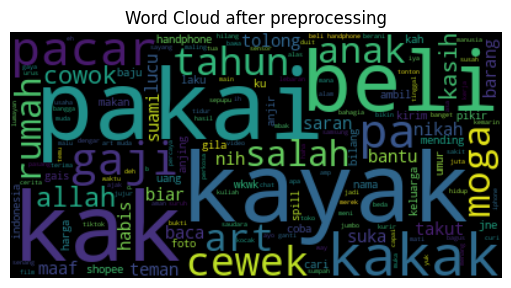

In [83]:
text_list = word_tokenize(data_f['text_akhir'].to_string())

word_data = Counter(text_list).most_common(25)

text_aft = "after preprocessing"
plt.figure(figsize=(18, 7))
plt.bar(*zip(*word_data))
plt.title('Word Frequency '+text_aft)
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

design_WordCloud(data_f['text_akhir'].to_string(), text_aft)

# Pelabelan

In [84]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")
 

lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

else:
    print("Failed to fetch negative lexicon data")

In [85]:
def sentiment_analysis_lexicon_indonesia(text):
    
    score = 0
    for word in text:       
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
 
    polarity=''
 
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [86]:
lexicon_positive

{'hai': 3,
 'merekam': 2,
 'ekstensif': 3,
 'paripurna': 1,
 'detail': 2,
 'pernik': 3,
 'belas': 2,
 'welas': 4,
 'kabung': 1,
 'rahayu': 4,
 'maaf': 2,
 'hello': 2,
 'promo': 3,
 'terimakasih': 5,
 'cover': 3,
 'mohon': 2,
 'mengawal': 2,
 'statistik': 1,
 'keluangan': 3,
 'jalan terbuka': 3,
 'banyaknya': 3,
 'lebar': 3,
 'bentang': 1,
 'hendaknya': 1,
 'silahkan': 3,
 'semboyan': 2,
 'ditunggu': 2,
 'akses': 2,
 'penerangan': 2,
 'hi': 1,
 'dibantu': 2,
 'makasih': 4,
 'halo': 1,
 'thanks': 3,
 'pengembangan': 3,
 'diva': 2,
 'punya': 3,
 'tidak segan': 2,
 'detailnya': 1,
 'tak segan': 2,
 'aktivasi': 2,
 'asih': 3,
 'kasih sayang': 5,
 'kekaguman': 4,
 'kehangatan': 4,
 'afeksi': 2,
 'renjana': 2,
 'amor': 2,
 'cinta kasih': 5,
 'tresna': 2,
 'filantropi': 2,
 'cintrong': 2,
 'suasana (hati)': 1,
 'dinamika': 3,
 'tuhan': 3,
 'merespon': 3,
 'makmur': 4,
 'suka cita': 4,
 'pengguna': 1,
 'tunggu': 1,
 'lotre': 2,
 'nggak': 1,
 'kupon': 3,
 'terpelihara': 4,
 'terawat': 5,
 'tersa

In [87]:
# bikin data baru supaya lebih fresh utk pelabelan
data_baru = data_f
data_baru 

,full_text,text_clean,text_casefoldingText,text_tokenizingText,text_slangwords,text_mergingText,text_tokenizingText2,text_stopword,text_stemming,text_akhir
0,@convomf gapunya pacar kak adanya ini https://...,gapunya pacar kak adanya ini,gapunya pacar kak adanya ini,"[gapunya, pacar, kak, adanya, ini]","[tidak punya, pacar, kak, adanya, ini]",tidak punya pacar kak adanya ini,"[tidak, punya, pacar, kak, adanya, ini]","[pacar, kak]","[pacar, kak]",pacar kak
1,@convomf chat lama sih tpi smpe slrg kl baca i...,chat lama sih tpi smpe slrg kl baca ini ttp ng...,chat lama sih tpi smpe slrg kl baca ini ttp ng...,"[chat, lama, sih, tpi, smpe, slrg, kl, baca, i...","[chat, lama, sih, tapi , sampai , slrg, kalau ...",chat lama sih tapi sampai slrg kalau baca i...,"[chat, lama, sih, tapi, sampai, slrg, kalau, b...","[chat, slrg, baca, terbahak-bahak]","[chat, slrg, baca, bahak]",chat slrg baca bahak
2,@convomf aku punya seekor yg kek gini https://...,aku punya seekor yg kek gini,aku punya seekor yg kek gini,"[aku, punya, seekor, yg, kek, gini]","[saya, punya, seekor, yang , kayak, begini]",saya punya seekor yang kayak begini,"[saya, punya, seekor, yang, kayak, begini]","[seekor, kayak]","[ekor, kayak]",ekor kayak
3,@convomf adanya sm driver lg nih kocak tbtb bg...,adanya sm driver lg nih kocak tbtb bgt proud o...,adanya sm driver lg nih kocak tbtb bgt proud o...,"[adanya, sm, driver, lg, nih, kocak, tbtb, bgt...","[adanya, sama , driver, lagi , nih, kocak, tib...",adanya sama driver lagi nih kocak tiba tiba ...,"[adanya, sama, driver, lagi, nih, kocak, tiba,...","[driver, nih, kocak, proud, of]","[driver, nih, kocak, proud, of]",driver nih kocak proud of
4,@convomf tiap kali baca ini ngakak terus https...,tiap kali baca ini ngakak terus,tiap kali baca ini ngakak terus,"[tiap, kali, baca, ini, ngakak, terus]","[tiap, kali, baca, ini, terbahak-bahak , terus]",tiap kali baca ini terbahak-bahak terus,"[tiap, kali, baca, ini, terbahak-bahak, terus]","[baca, terbahak-bahak]","[baca, bahak]",baca bahak
...,...,...,...,...,...,...,...,...,...,...
1587,@convomf Good lah kalo ikut bangga dengan penc...,Good lah kalo ikut bangga dengan pencapaian so...,good lah kalo ikut bangga dengan pencapaian so...,"[good, lah, kalo, ikut, bangga, dengan, pencap...","[good, lah, kalau , ikut, bangga, dengan, penc...",good lah kalau ikut bangga dengan pencapaian ...,"[good, lah, kalau, ikut, bangga, dengan, penca...","[good, bangga, pencapaian, saudaranya, namanya...","[good, bangga, capai, saudara, nama, saudara, ...",good bangga capai saudara nama saudara hasil
1588,@convomf Takut banget kalau dikasih tau gajiny...,Takut banget kalau dikasih tau gajinya berapa ...,takut banget kalau dikasih tau gajinya berapa ...,"[takut, banget, kalau, dikasih, tau, gajinya, ...","[takut, sekali , kalau, dikasih, tahu, gajinya...",takut sekali kalau dikasih tahu gajinya berap...,"[takut, sekali, kalau, dikasih, tahu, gajinya,...","[takut, dikasih, gajinya, pinjam, duit, keperl...","[takut, kasih, gaji, pinjam, duit, perlu, pas,...",takut kasih gaji pinjam duit perlu pas tagih g...
1589,@convomf km bocil y nder,km bocil y nder,km bocil y nder,"[km, bocil, y, nder]","[kamu, bocah cilik, iya, nder]",kamu bocah cilik iya nder,"[kamu, bocah, cilik, iya, nder]","[bocah, cilik, iya]","[bocah, cilik, iya]",bocah cilik iya
1590,@convomf 3 dari nama yg disitu gue kenal nder....,dari nama yg disitu gue kenal nder Kira inisia...,dari nama yg disitu gue kenal nder kira inisia...,"[dari, nama, yg, disitu, gue, kenal, nder, kir...","[dari, nama, yang , di situ, saya, kenal, nder...",dari nama yang di situ saya kenal nder kira i...,"[dari, nama, yang, di, situ, saya, kenal, nder...","[nama, situ, kenal, inisial, nih]","[nama, situ, kenal, inisial, nih]",nama situ kenal inisial nih


In [88]:
results = data_baru['text_slangwords'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data_baru['polarity_score'] = results[0]
data_baru['polarity'] = results[1]
print(data_baru['polarity'].value_counts())
print(data_baru['polarity_score'])

polarity
negative    1080
positive     512
Name: count, dtype: int64
0      -1
1       1
2      -4
3       3
4       2
       ..
1587   -5
1588   -9
1589    0
1590   -5
1591    4
Name: polarity_score, Length: 1592, dtype: int64


In [89]:
data_baru[['polarity_score','polarity']]

,polarity_score,polarity
0,-1,negative
1,1,positive
2,-4,negative
3,3,positive
4,2,positive
...,...,...
1587,-5,negative
1588,-9,negative
1589,0,positive
1590,-5,negative


In [90]:
data_baru["polarity"].count()

1592

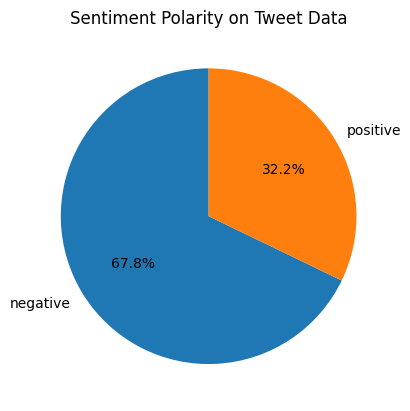

In [91]:
plt.pie(data_baru.polarity.value_counts(), labels = data_baru.polarity.drop_duplicates(), autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Polarity on Tweet Data")
plt.show() 

# Data Splitting & Extraction Features

In [92]:
co_vect = CountVectorizer()
tf_vect = TfidfVectorizer()
hash_vect = HashingVectorizer()

# vect_list = [co_vect, tf_vect, hash_vect]
vect_list = [co_vect, tf_vect]

In [93]:
x = data_baru["full_text"]
y = data_baru["polarity"]

data_vect=[]
splitdata_list = []
for j in range(len(vect_list)):
    vectorized = vect_list[j].fit_transform(x).toarray()
    data_vect.append(vectorized)
    
for k in range(len(data_vect)):
    x_train, x_test, y_train, y_test = train_test_split(data_vect[k], y, test_size=0.2, random_state=42)
    print(vect_list[k])
    print("Length x_train:", x_train.shape[0])
    print("Length y_train:",y_train.shape[0])
    print("Length x_test:", x_test.shape[0])
    print("Length y_test:", y_test.shape[0], "\n")
    

CountVectorizer()
Length x_train: 1273
Length y_train: 1273
Length x_test: 319
Length y_test: 319 

TfidfVectorizer()
Length x_train: 1273
Length y_train: 1273
Length x_test: 319
Length y_test: 319 



In [94]:
data_vect

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [95]:
y_train.value_counts()

polarity
negative    863
positive    410
Name: count, dtype: int64

# Modelling & Evaluation

In [96]:
svm = SVC()
rf = RandomForestClassifier() 
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=42)
lr = LogisticRegression()
gnb = GaussianNB()

In [97]:
def findMetrics(x_train, x_test, y_train, y_test, train, model_label, vect_label):
    y_pred_train = train.predict(x_train)
    y_pred_test = train.predict(x_test)
    print("Klasifikasi", model_label , "dengan",vect_label,":")
    print("Accuracy Train:", accuracy_score(y_train, y_pred_train) * 100)
    print("Accuracy Test:", accuracy_score(y_test, y_pred_test) * 100)
    print("\n")

def train_model(classification, x_train, y_train):
    train = classification.fit(x_train, y_train)
    return train

In [98]:
# untuk sementara, kita execute vectorizer lain saja. jangan execute hashing vector karena terlalu makan waktu
classifications = [svm, rf, dt, lr, knn, gnb]

for i in range(len(classifications)):
    for j in range(len(vect_list)):
        x_train, x_test, y_train, y_test = train_test_split(data_vect[j], y, test_size=0.2, random_state=42)
        train = train_model(classifications[i], x_train, y_train)
        findMetrics(x_train, x_test, y_train, y_test, train, classifications[i], vect_list[j]) 

Klasifikasi SVC() dengan CountVectorizer() :
Accuracy Train: 94.65828750981933
Accuracy Test: 76.17554858934169


Klasifikasi SVC() dengan TfidfVectorizer() :
Accuracy Train: 99.7643362136685
Accuracy Test: 72.72727272727273


Klasifikasi RandomForestClassifier() dengan CountVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 78.68338557993731


Klasifikasi RandomForestClassifier() dengan TfidfVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 74.29467084639498


Klasifikasi DecisionTreeClassifier() dengan CountVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 76.8025078369906


Klasifikasi DecisionTreeClassifier() dengan TfidfVectorizer() :
Accuracy Train: 100.0
Accuracy Test: 73.04075235109718


Klasifikasi LogisticRegression() dengan CountVectorizer() :
Accuracy Train: 99.68578161822467
Accuracy Test: 83.07210031347962


Klasifikasi LogisticRegression() dengan TfidfVectorizer() :
Accuracy Train: 87.03849175176748
Accuracy Test: 73.98119122257053


Klasifikasi KNeighborsClassifier

Berdasarkan hasil evaluasi, akurasi testing tertinggi adalah Logistic Regression dengan Count Vectorizer

# Sentence Testing
- Memilih model logistic regression karena akurasi tertinggi dengan Count Vectorizer

In [100]:
# memasukkan kalimat baru pada output
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_casefolded)
kalimat_baru_slangfixed = replacingText(kalimat_baru_tokenized)
kalimat_baru_merged = toSentence(kalimat_baru_slangfixed)
kalimat_baru_tokenized2 = tokenizingText(kalimat_baru_merged)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized2)
kalimat_baru_stemmed = stemmingText(kalimat_baru_filtered)
kalimat_baru_final = toSentence(kalimat_baru_stemmed)

vect_kalimat_baru = co_vect.transform([kalimat_baru_final])

prediksi_sentimen = lr.predict(vect_kalimat_baru)

if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NEUTRAL.")

Sentimen kalimat baru adalah NEGATIF.
